In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.isnull().count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

### Select Columns required for model

In [5]:
X=dataset.iloc[:,3:-1]

In [6]:
y=dataset.iloc[:,-1]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

### Dummy Variables for Categorical Variables

In [9]:
X_Geography=pd.get_dummies(X['Geography'],drop_first=True)

In [10]:
X_Gender=pd.get_dummies(X['Gender'],drop_first=True)

In [11]:
X_Geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [12]:
X_Gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [13]:
X=pd.concat([X,X_Geography,X_Gender],axis=1)

### Drop Columns Geography & Gender

In [14]:
X.drop(['Geography','Gender'],axis=1,inplace=True)

In [15]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


### Train Test Split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

### Standard Scalling

In [17]:
ss=StandardScaler()

In [18]:
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
X_train=ss.transform(X_train)

In [20]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [21]:
ss.fit(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
X_test=ss.transform(X_test)

In [23]:
X_test

array([[-0.56129438, -0.39401698,  0.9869706 , ...,  1.62776996,
        -0.57427105, -1.11339196],
       [-1.33847768,  0.07611425, -1.08432132, ..., -0.61433742,
        -0.57427105, -1.11339196],
       [ 0.58347561,  0.26416674,  0.9869706 , ..., -0.61433742,
         1.74133801, -1.11339196],
       ...,
       [-0.76084144, -0.29999074, -1.42953664, ..., -0.61433742,
         1.74133801,  0.8981563 ],
       [-0.0046631 , -0.48804323, -0.39389068, ...,  1.62776996,
        -0.57427105,  0.8981563 ],
       [-0.81335383, -0.86414821,  0.9869706 , ...,  1.62776996,
        -0.57427105,  0.8981563 ]])

### Initialize ANN

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.


### Initialize classifier

In [25]:
classifier=Sequential()

### Add first input layer and first hidden layer

In [26]:
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))

Instructions for updating:
Colocations handled automatically by placer.


### Mid Layer

In [27]:
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

### Output Layer

In [28]:
classifier.add(Dense(units=1,init='glorot_uniform',activation='sigmoid'))

In [29]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [30]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,nb_epoch=100)

Instructions for updating:
Use tf.cast instead.
Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 1s 104us/step - loss: 0.5362 - accuracy: 0.7979 - val_loss: 0.4887 - val_accuracy: 0.8012
Epoch 2/100
5359/5359 [==============================] - 0s 81us/step - loss: 0.4725 - accuracy: 0.8072 - val_loss: 0.4613 - val_accuracy: 0.8020
Epoch 3/100
5359/5359 [==============================] - 0s 80us/step - loss: 0.4523 - accuracy: 0.8099 - val_loss: 0.4503 - val_accuracy: 0.8031
Epoch 4/100
5359/5359 [==============================] - 0s 80us/step - loss: 0.4426 - accuracy: 0.8138 - val_loss: 0.4443 - val_accuracy: 0.8054
Epoch 5/100
5359/5359 [==============================] - 0s 80us/step - loss: 0.4365 - accuracy: 0.8153 - val_loss: 0.4405 - val_accuracy: 0.8061
Epoch 6/100
5359/5359 [==============================] - 0s 79us/step - loss: 0.4325 - accuracy: 0.8158 - val_loss: 0.4377 - val_accuracy: 0.8061
Epoch 7/100
5359/5359 [====

In [31]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy



dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


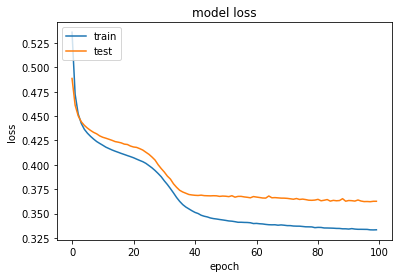

In [32]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
y_pred=classifier.predict(X_test)

In [34]:
y_pred = (y_pred > 0.5)

In [35]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### Performance Metrics

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [37]:
confusion_matrix(y_test,y_pred)

array([[1542,   53],
       [ 224,  181]], dtype=int64)

In [38]:
accuracy_score(y_test,y_pred)

0.8615

In [39]:
precision_score(y_test,y_pred)

0.7735042735042735

In [40]:
recall_score(y_test,y_pred)

0.4469135802469136

In [41]:
f1_score(y_test,y_pred)

0.5665101721439749